# Training with Physicell pcld

### Import libraries

In [1]:
import anndata as ad  
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import pcdl

### Output directory

In [2]:
# const
s_path_2d = 'Physicell_NLCs-CLL/output/'

# pcdl version
pcdl.__version__

'3.2.13'

### 1. Load time series data

In [3]:
mcdsts = pcdl.TimeSeries(s_path_2d) 

reading: Physicell_NLCs-CLL/output/PhysiCell_settings.xml
Warning @ pyMCDS._read_xml : cell_definition custom_data without variable type setting detected. ['sample']
reading: Physicell_NLCs-CLL/output/output00000000.xml
working on metadata ...
working on mesh data ...
reading: Physicell_NLCs-CLL/output/initial_mesh0.mat
working on microenvironment data ...
reading: Physicell_NLCs-CLL/output/output00000000_microenvironment0.mat
parsing: anti-apoptotic_factor data
parsing: debris data
working on discrete cell data ...
reading: Physicell_NLCs-CLL/output/output00000000_cells.mat
working on graph data ...
reading: Physicell_NLCs-CLL/output/output00000000_cell_neighbor_graph.txt
reading: Physicell_NLCs-CLL/output/output00000000_attached_cells_graph.txt
done!

reading: Physicell_NLCs-CLL/output/PhysiCell_settings.xml
Warning @ pyMCDS._read_xml : cell_definition custom_data without variable type setting detected. ['sample']
reading: Physicell_NLCs-CLL/output/output00000001.xml
working on metad

#### 1.1. Cell states

In [9]:
dl_list = mcdsts.get_cell_df_states(allvalues=True, states=2)  # states=2
print('total features df_cell:', len(dl_list))
json.dump(dl_list, open(f'{s_path_2d}cell_df_feature_states.json', 'w'))

total features df_cell: 114


#### 1.2. Conc states

In [10]:
dl_list = mcdsts.get_conc_df_states(allvalues=True, states=1)  # states=2
print('total features df_conc:', len(dl_list))
json.dump(dl_list, open(f'{s_path_2d}conc_df_feature_states.json', 'w'))

total features df_conc: 2


#### 1.3. Anndata object

In [13]:
annts = mcdsts.get_anndata()
l_ann = mcdsts.get_anndata(collapse=False)
print('annts:\n', annts)
print()
print('l_ann:\n', l_ann[0:3])

annts:
 AnnData object with n_obs × n_vars = 1020875 × 110
    obs: 'ID', 'z_layer', 'time', 'cell_type', 'current_death_model', 'current_phase', 'cycle_model'
    obsm: 'spatial'


#### 1.4. Analize Time Step 

In [14]:
mcds = mcdsts.get_mcds_list()[9]  # watch out: this mcds is a pyMCDS object and has no get_anndata function!
mcds = mcdsts.get_annmcds_list()[9] # this mcds is a TimeStep object and has a get_anndata function!
print('mcds:\n', mcds)

mcds:
 AnnData object with n_obs × n_vars = 4861 × 110
    obs: 'z_layer', 'time', 'cell_type', 'current_death_model', 'current_phase', 'cycle_model'
    obsm: 'spatial'


### 2. Load time step data

In [4]:
mcds = pcdl.TimeStep(f'{s_path_2d}output00000009.xml') # this mcds is a TimeStep object has a get_anndata functionality!

reading: Physicell_NLCs-CLL/output/PhysiCell_settings.xml
Warning @ pyMCDS._read_xml : cell_definition custom_data without variable type setting detected. ['sample']
reading: Physicell_NLCs-CLL/output/output00000009.xml
working on metadata ...
working on mesh data ...
reading: Physicell_NLCs-CLL/output/initial_mesh0.mat
working on microenvironment data ...
reading: Physicell_NLCs-CLL/output/output00000009_microenvironment0.mat
parsing: anti-apoptotic_factor data
parsing: debris data
working on discrete cell data ...
reading: Physicell_NLCs-CLL/output/output00000009_cells.mat
working on graph data ...
reading: Physicell_NLCs-CLL/output/output00000009_cell_neighbor_graph.txt
reading: Physicell_NLCs-CLL/output/output00000009_attached_cells_graph.txt
done!


#### 2.1. Cell states

<class 'pandas.core.frame.DataFrame'>
Index: 4861 entries, 0 to 4939
Columns: 125 entries, NLCs_attack_rates to voxel_k
dtypes: bool(3), float64(111), int64(7), object(4)
memory usage: 4.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 4861 entries, 0 to 4939
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   anti-apoptotic_factor_uptake_rates     4861 non-null   float64
 1   apoptotic_live_phagocytosis_rates      4861 non-null   float64
 2   apoptotic_transformation_rates         4861 non-null   float64
 3   cell_count_voxel                       4861 non-null   int64  
 4   cell_density_micron3                   4861 non-null   float64
 5   cell_type                              4861 non-null   object 
 6   chemotaxis_index                       4861 non-null   int64  
 7   current_cycle_phase_exit_rate          4861 non-null   float64
 8   current_phase       

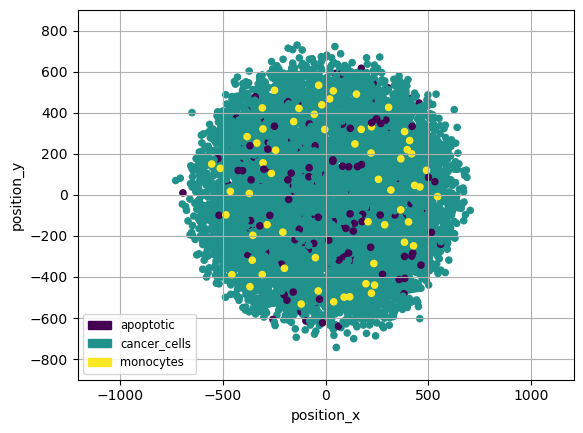

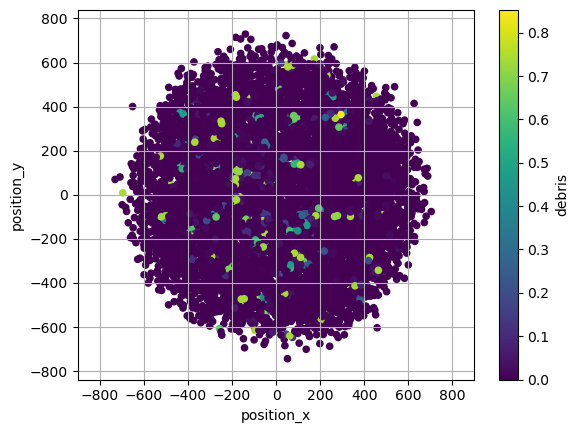

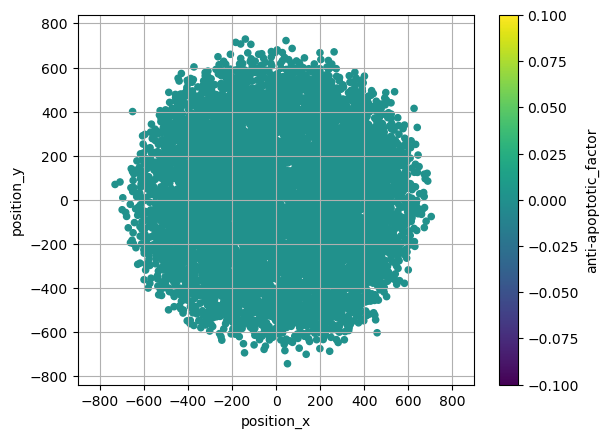

In [29]:
df_cell1 = mcds.get_cell_df(states=1)
df_cell1.info()
sorted(df_cell1.columns)

df_cell2 = mcds.get_cell_df(states=2)
df_cell2.info()
sorted(df_cell2.columns)

mcds.get_scatter()
mcds.get_scatter('debris')
mcds.get_scatter('anti-apoptotic_factor')
print()

#### 2.2. Concentration states

es_delete: {'anti-apoptotic_factor'}
<class 'pandas.core.frame.DataFrame'>
Index: 8100 entries, 0 to 8099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   voxel_i        8100 non-null   int64  
 1   voxel_j        8100 non-null   int64  
 2   voxel_k        8100 non-null   int64  
 3   mesh_center_m  8100 non-null   float64
 4   mesh_center_n  8100 non-null   float64
 5   mesh_center_p  8100 non-null   float64
 6   debris         8100 non-null   float64
 7   time           8100 non-null   float64
 8   runtime        8100 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 632.8 KB



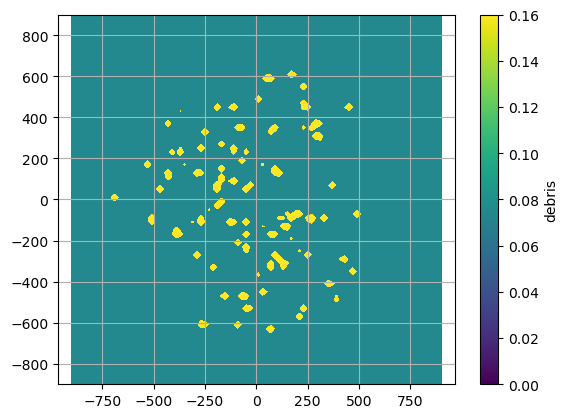

In [6]:
df_conc = mcds.get_conc_df(states=2)
df_conc.info()
mcds.get_substrate_names()

mcds.get_contour('debris', vmin=0.0, vmax=0.16)
print()

#### 2.3. Get units

In [7]:
mcds.get_unit_se()

feature
NLCs_attack_rates                        1/min
NLCs_cell_adhesion_affinities             none
NLCs_fusion_rates                        1/min
NLCs_live_phagocytosis_rates             1/min
NLCs_transformation_rates                1/min
                                     ...      
total_attack_time                          min
total_volume                     cubic microns
velocity_x                          micron/min
velocity_y                          micron/min
velocity_z                          micron/min
Name: unit, Length: 113, dtype: object

#### 2.4. Anndata

In [8]:
# loads only feature that have not the same value in all cells.
# max absolute scales the features into a range between -1 and 1.
ann = mcds.get_anndata(states=2, scale='maxabs')
ann
ann.obs.head()
ann.obsm
ann.obsm['spatial']
ann.var
ann.var.keys
ann.X
# save anndata objects
ann.write(f'{s_path_2d}interaction_16200min.h5ad')
# load anndata objects
ann = ad.read(f'{s_path_2d}interaction_16200min.h5ad')
# features
print('x_axis: genes: numerical features:\n', ann.var_names)  # list the numerical features we have at hand (alternative way: ann.var.index).
print('y_axis: cells: categorical features:\n', ann.obs_keys())  # list the categories features we have at hand (alternative way: ann.obs.columns).

processing: 1/1 540.0[min] mcds into anndata obj.
x_axis: genes: numerical features:
 Index(['anti-apoptotic_factor_uptake_rates',
       'apoptotic_live_phagocytosis_rates', 'apoptotic_transformation_rates',
       'cell_count_voxel', 'cell_density_micron3', 'chemotaxis_index',
       'current_cycle_phase_exit_rate', 'cytoplasmic_biomass_change_rate',
       'cytoplasmic_volume', 'dead', 'dead_phagocytosis_rate', 'death_rates_0',
       'debris', 'debris_internalized_total_substrates',
       'debris_saturation_densities', 'debris_secretion_rates',
       'elapsed_time_in_phase', 'fluid_fraction', 'is_motile',
       'macrophages_transformation_rates', 'migration_bias',
       'migration_bias_direction_vectorlength', 'migration_bias_direction_x',
       'migration_bias_direction_y', 'motility_vector_vectorlength',
       'motility_vector_x', 'motility_vector_y', 'nuclear_biomass_change_rate',
       'nuclear_radius', 'nuclear_volume', 'position_vectorlength', 'pressure',
       'radiu

/home/marcelo/mambaforge/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


### 3. Data Analysis 

#### 3.1. Plot categorical data: Time step

<Axes: title={'center': 'cell_type fraction'}>

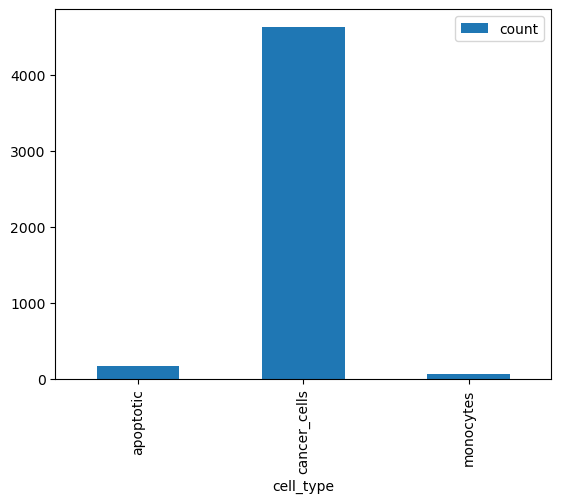

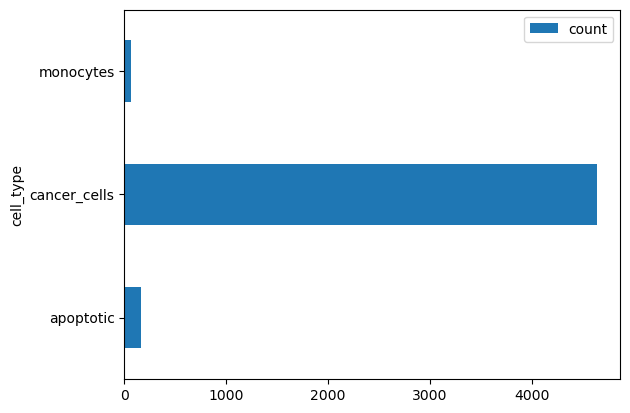

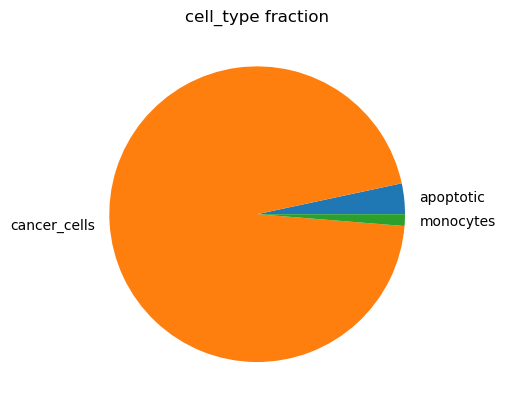

In [9]:
# bar plot
df = df_cell2.loc[:,['cell_type']]   # ['cell_type','current_phase']
df['count'] = '1'
df_bar = df.groupby(['cell_type']).count()  # ['cell_type','current_phase']
df_bar
df_bar.plot(kind='bar')
df_bar.plot(kind='barh')
df_bar.plot(kind='pie', y='count', legend=False, ylabel='', title='cell_type fraction')

#### 3.2. Plot numerical data: Time step

<Axes: title={'center': 'cell surrounding substrate'}, ylabel='Frequency'>

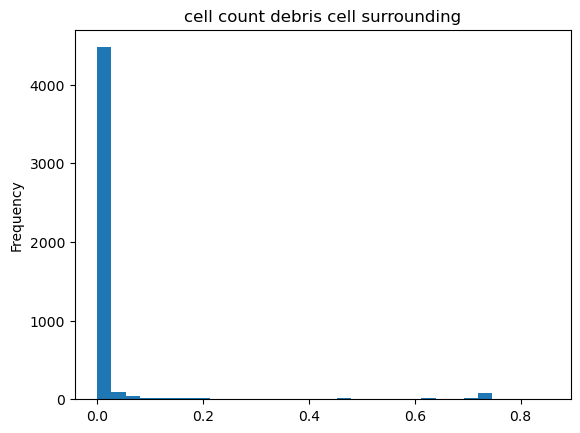

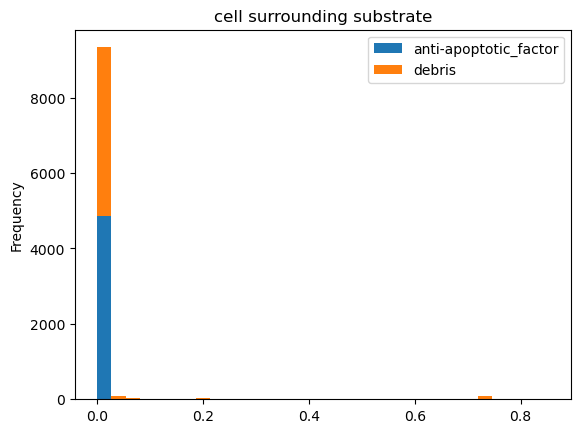

In [32]:
# count histogram
df_cell1.loc[:,'debris'].plot(kind='hist', bins=32, title='cell count debris cell surrounding')  
df_cell1.loc[:,['anti-apoptotic_factor','debris']].plot(kind='hist', bins=32, title='cell surrounding substrate', stacked=True)  

<Axes: title={'center': 'cell fraction debris in cell surrounding'}, ylabel='Frequency'>

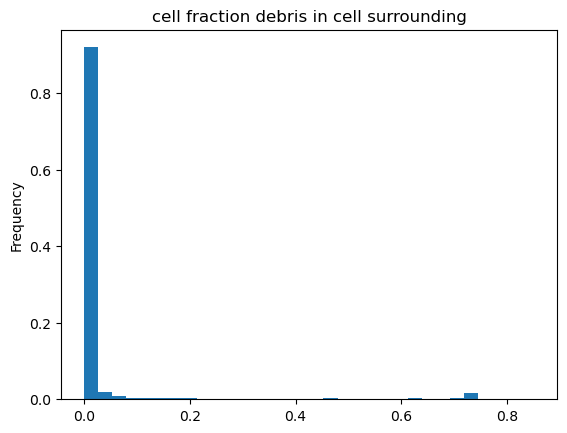

In [33]:
# probability histogram
se_debris = df_cell1.loc[:,'debris']
a_ones = np.ones_like(se_debris)
a_weight = a_ones / se_debris.shape[0]
se_debris.plot(kind='hist', bins=32, title='cell fraction debris in cell surrounding', weights=a_weight)

#### 3.3. Plot spatial data: Time step

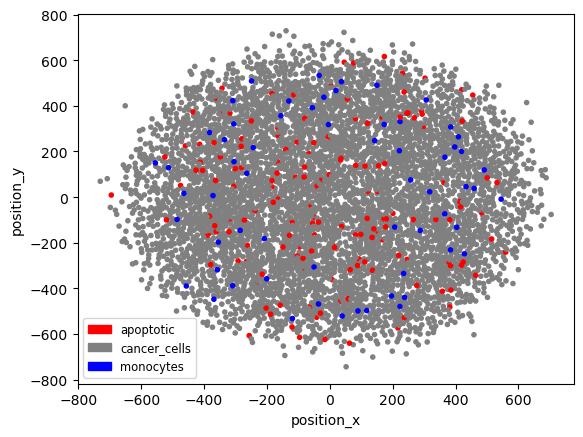

In [35]:
## map cell_type and colors ##
sorted(df_cell1.loc[:,'cell_type'].unique())

ds_color = {
    'cancer_cells' : 'grey',
    'apoptotic' : 'red',
    'monocytes' : 'blue'
}

df_cell1['cell_type_color'] = None
#print('df_cell before loop:\n', df_cell.loc[:,['cell_type', 'cell_type_color']])  # show dataframe
for s_celltype in df_cell1.loc[:,'cell_type'].unique():
    df_cell1.loc[df_cell1.loc[:,'cell_type'] == s_celltype, 'cell_type_color'] = ds_color[s_celltype]
#print('df_cell after loop:\n', df_cell.loc[:,['cell_type', 'cell_type_color']])  # show dataframe
df_cell1.plot(kind='scatter', x='position_x', y='position_y', c=df_cell1.loc[:,'cell_type_color'], s=9)

## add color legend ##
lo_patch = []
for s_label, s_color in sorted(ds_color.items()):
    o_patch = mpatches.Patch(color=s_color, label=s_label)
    lo_patch.append(o_patch)

ax = plt.gca()
ax.legend(
    handles = lo_patch,
    loc = 'lower left',
    fontsize = 'small'
)

<Axes: title={'center': 'spatial debris level'}, xlabel='mesh_center_m', ylabel='mesh_center_n'>

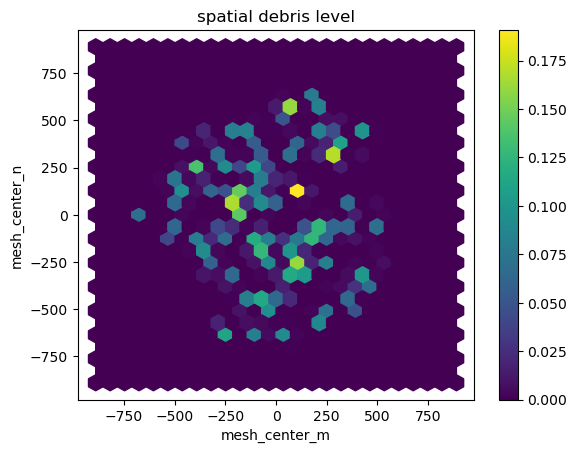

In [36]:
# hexbin - get_contour() equivalent
df_conc.plot(kind='hexbin', x='mesh_center_m', y='mesh_center_n', C='debris', gridsize=25, cmap='viridis', title='spatial debris level')   

#### 3.4. Time series: pandas plot ordered data

In [14]:
df_series = None
for timestep in mcdsts.get_mcds_list():
    df_cell = timestep.get_cell_df()
    df_celltype = df_cell.loc[:,['cell_type','time']].copy()
    # get count per cell type
    s_time = str(list(df_celltype.loc[:,'time'])[0])
    df_celltype.columns = ['cell_type', s_time]
    df_count = df_celltype.groupby('cell_type').count()  # pandas dataframe
    # store result    
    if (df_series is None):
        df_series = df_count
    else:
        df_series = pd.merge(df_series, df_count, left_index=True, right_index=True, how='outer')
    #break

df_series

,0.0,60.0,120.0,180.0,240.0,300.0,360.0,420.0,480.0,540.0,...,18180.0,18240.0,18300.0,18360.0,18420.0,18480.0,18540.0,18600.0,18660.0,18720.0
cell_type,,,,,,,,,,,,,,,,,,,,,
NLCs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0
apoptotic,227.0,199.0,192.0,191.0,188.0,172.0,171.0,168.0,172.0,163.0,...,51.0,52.0,49.0,48.0,45.0,46.0,41.0,37.0,39.0,40.0
cancer_cells,4762.0,4751.0,4737.0,4720.0,4708.0,4696.0,4678.0,4663.0,4646.0,4636.0,...,1957.0,1949.0,1947.0,1940.0,1936.0,1932.0,1928.0,1927.0,1919.0,1914.0
macrophages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
monocytes,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='time [min]', ylabel='count [cell]'>

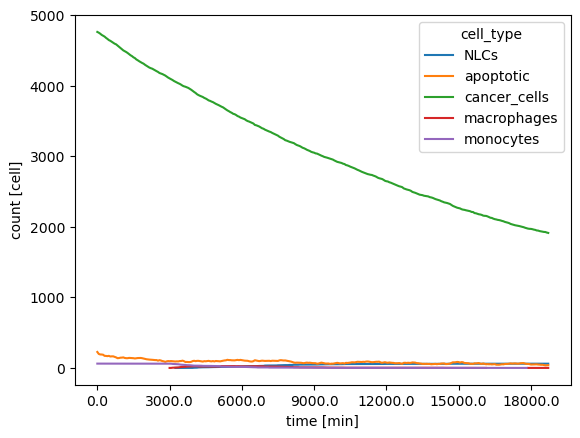

In [59]:
#list(df_series.columns)[0]
df_series.T.plot(kind='line', xlabel='time [min]', ylabel='count [cell]', logy=False)  # logy=True

<Axes: xlabel='time [min]', ylabel='count [cell]'>

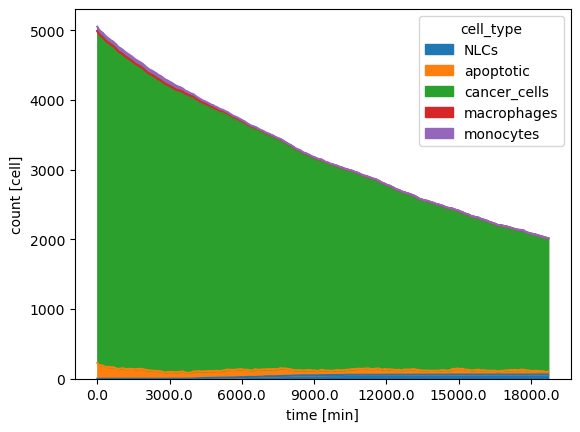

In [16]:
# area plot
df_series.T.plot(kind='area', xlabel='time [min]', ylabel='count [cell]')

#### 3.5. Matplotlib Embedding of Pandas and pcdl Plots

categories found: {'apoptotic', 'cancer_cells', 'monocytes'}.
min max extrema set to: [None, None].
xlim set to: (-900.0, 900.0).
ylim set to: (-900.0, 900.0).


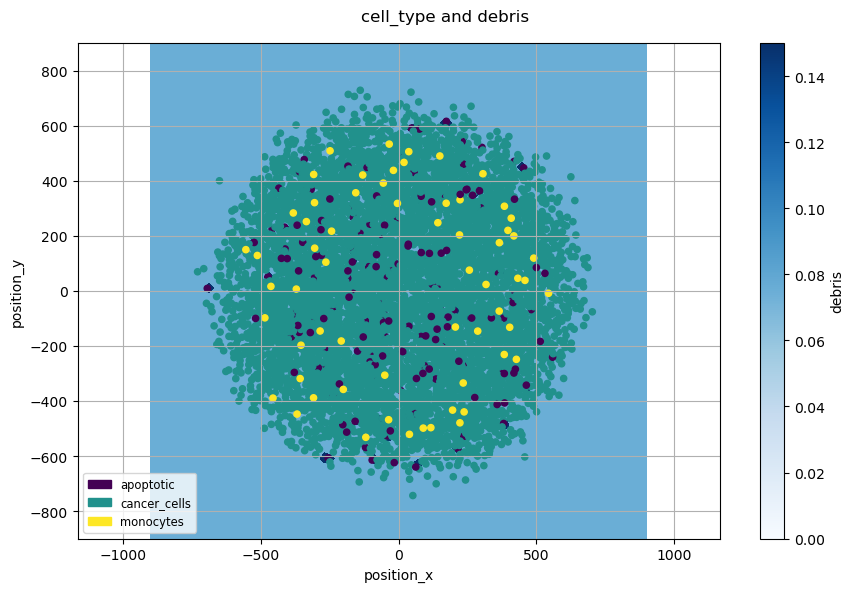

In [17]:
# pandas to matplotlib
fig, ax = plt.subplots(figsize=(9,6))
fig.suptitle('cell_type and debris')
ax.axis('equal')
mcds.get_contour('debris', vmin=0, vmax=0.15, cmap='Blues', ax=ax)
mcds.get_scatter(ax=ax)
plt.tight_layout()
fig.savefig(f'{s_path_2d}celltype_debris_fusion.png', facecolor='white')
#plt.close()

categories found: {'apoptotic', 'cancer_cells', 'monocytes'}.
min max extrema set to: [None, None].
xlim set to: (-900.0, 900.0).
ylim set to: (-900.0, 900.0).


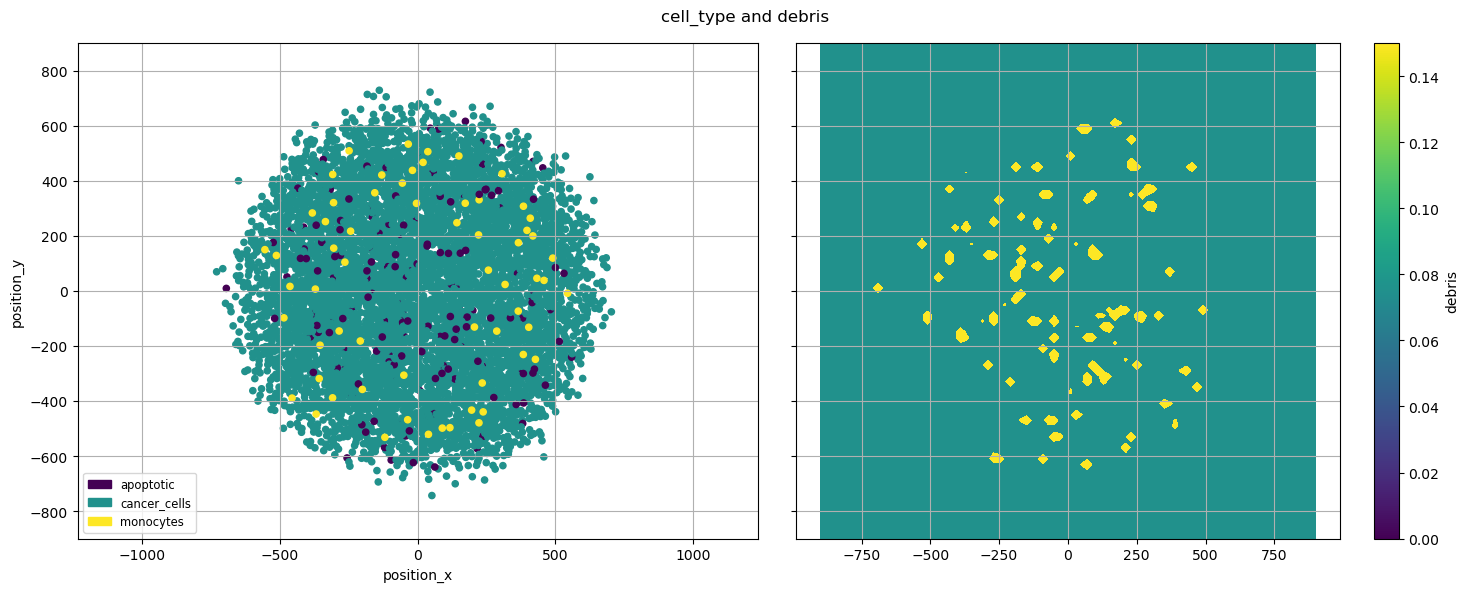

In [18]:
# pandas to matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,6))
fig.suptitle('cell_type and debris')
ax = ax.ravel()
ax[0].axis('equal')
ax[1].axis('equal')
# scatter
mcds.get_scatter(ax=ax[0])
# contour
mcds.get_contour('debris', vmin=0, vmax=0.15, cmap='viridis', ax=ax[1])
# finalize
plt.tight_layout()
fig.savefig(f'{s_path_2d}celltype_debris_separate.png', facecolor='white')
#plt.close()